In [1]:
import pandas as pd
import numpy as np
from numpy import mean, std, median
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,  train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, make_scorer, classification_report, recall_score,r2_score, accuracy_score, cohen_kappa_score, classification_report, confusion_matrix, precision_score,f1_score 
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score, KFold, StratifiedKFold 
from imblearn.pipeline import Pipeline 
from imblearn.pipeline import make_pipeline as imbpipeline
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE, ADASYN
import scikitplot as skplt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
#Random seed used in R was 7
random_seed=7

In [3]:
#read input data
train_data=pd.read_csv('training_data_final.csv')
test_data=pd.read_csv('test_data_final.csv')

In [4]:
#set features and target variable 
features=[ 
    'ngrams_last_mean',
    'minwordlength',
    'nroflemmas',
    'polyscore_max',
    'nrpartrels_normalised',
    'nrhypos',
    'glosslength_normalised',
    'depthfromtopsynset_normalised',
    'nrdirhypers', 
 ]
target=['vote']

In [5]:
X_train=np.array(train_data[features])
y_train= np.array(train_data[target])
test_set=np.array(test_data[features])

In [6]:
#run SMOTE algorithm to deal with class imbalances - make basic class same amount as non-basic
sm = SMOTE(random_state=random_seed, k_neighbors=2)
X_train, y_train = sm.fit_resample(X_train, y_train)
print ('Shape of oversampled data: {}'.format(X_train.shape))
print ('Shape of Y: {}'.format(y_train.shape))

Shape of oversampled data: (1384, 9)
Shape of Y: (1384,)


In [7]:
#define model and fit oversampled training sets
rf = RandomForestClassifier(random_state=random_seed, max_features='sqrt', n_estimators=1400, oob_score=True, criterion='gini', bootstrap=True).fit(X_train, y_train.ravel())

In [8]:
y_pred = rf.predict(test_set)

In [9]:
print(y_pred)

['nb' 'nb' 'nb' ... 'nb' 'nb' 'nb']


In [10]:
results=pd.read_csv('results_syns_list.csv')

In [11]:
len(results)

74374

In [12]:
res=pd.DataFrame(y_pred)

In [13]:
res

,0
0,nb
1,nb
2,nb
3,nb
4,nb
...,...
74369,nb
74370,nb
74371,nb
74372,nb


In [14]:
results['Predicted']=res[0]

In [15]:
results

,Unnamed: 0,Synset,Name,Predicted
0,0,Synset('abstraction.n.06'),abstraction.n.06,nb
1,1,Synset('physical_entity.n.01'),physical_entity.n.01,nb
2,2,Synset('thing.n.08'),thing.n.08,nb
3,3,Synset('attribute.n.02'),attribute.n.02,nb
4,4,Synset('communication.n.02'),communication.n.02,nb
...,...,...,...,...
74369,74369,Synset('milking_shorthorn.n.01'),milking_shorthorn.n.01,nb
74370,74370,Synset('gaur.n.01'),gaur.n.01,nb
74371,74371,Synset('gayal.n.01'),gayal.n.01,nb
74372,74372,Synset('bucking_bronco.n.01'),bucking_bronco.n.01,nb


In [16]:
results.to_csv('EX3/predicted_results_ngrams.csv')

In [17]:
basic=results[results['Predicted']=='b']

In [18]:
basic

,Unnamed: 0,Synset,Name,Predicted
30,30,Synset('eidos.n.01'),eidos.n.01,b
34,34,Synset('personality.n.01'),personality.n.01,b
80,80,Synset('rare_earth.n.01'),rare_earth.n.01,b
88,88,Synset('varna.n.02'),varna.n.02,b
96,96,Synset('playing_period.n.01'),playing_period.n.01,b
...,...,...,...,...
74098,74098,Synset('ox.n.02'),ox.n.02,b
74104,74104,Synset('chamois.n.02'),chamois.n.02,b
74108,74108,Synset('takin.n.01'),takin.n.01,b
74140,74140,Synset('mustang.n.01'),mustang.n.01,b


In [19]:
basic.to_csv('EX3/predicted_basic_level_ngrams.csv')

Feature: 0, Score: 0.13252
Feature: 1, Score: 0.10969
Feature: 2, Score: 0.04858
Feature: 3, Score: 0.07174
Feature: 4, Score: 0.06656
Feature: 5, Score: 0.08348
Feature: 6, Score: 0.13735
Feature: 7, Score: 0.34124
Feature: 8, Score: 0.00885


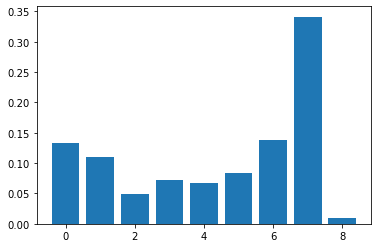

In [20]:
# get feature importance
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
fig1=plt.figure()
a=plt.bar([x for x in range(len(importance))], importance)
#plt.savefig('ck/feature_importance_global.png')
plt.show()

In [21]:
imp=[]
for i,v in enumerate(importance):
    imp.append(v)

In [22]:
df4=pd.DataFrame(imp)
df4['Features']=features
df4=df4.rename(columns={0:'Importance'})

In [23]:
df5=df4[['Features', 'Importance']].sort_values('Importance',ascending=False)

In [24]:
df5

,Features,Importance
7,depthfromtopsynset_normalised,0.341240
6,glosslength_normalised,0.137347
0,ngrams_last_mean,0.132521
1,minwordlength,0.109688
5,nrhypos,0.083475
3,polyscore_max,0.071739
4,nrpartrels_normalised,0.066558
2,nroflemmas,0.048582
8,nrdirhypers,0.008850


In [25]:
df5.to_csv('EX3/FI_predict_entity_ngrams.csv')

In [26]:
res.to_csv('EX3/y_pred_results_ngrams.csv')

In [27]:
b=pd.read_csv('EX3/predicted_basic_level_ngrams.csv')

In [28]:
basic_syns=pd.DataFrame()

In [29]:
basic_syns['Synset']=b['Synset']

In [30]:
basic_syns.to_csv('basiclevels.txt', header=None, index=None, sep='\n')

In [34]:
lauras_basic=pd.read_csv('lauras_basiclevels.csv', sep='\t', header=None)

In [35]:
agreed_syns=pd.merge(b, lauras_basic, left_on='Synset', right_on=[0], how='inner')
agreed_syns

,Unnamed: 0,Unnamed: 0.1,Synset,Name,Predicted,0,1
0,34,34,Synset('personality.n.01'),personality.n.01,b,Synset('personality.n.01'),personality
1,88,88,Synset('varna.n.02'),varna.n.02,b,Synset('varna.n.02'),varna
2,107,107,Synset('volume.n.01'),volume.n.01,b,Synset('volume.n.01'),volume
3,138,138,Synset('diagonal.n.04'),diagonal.n.04,b,Synset('diagonal.n.04'),diagonal
4,391,391,Synset('nature.n.01'),nature.n.01,b,Synset('nature.n.01'),nature
...,...,...,...,...,...,...,...
4224,74097,74097,Synset('cattle.n.01'),cattle.n.01,b,Synset('cattle.n.01'),cattle
4225,74098,74098,Synset('ox.n.02'),ox.n.02,b,Synset('ox.n.02'),ox
4226,74104,74104,Synset('chamois.n.02'),chamois.n.02,b,Synset('chamois.n.02'),chamois
4227,74108,74108,Synset('takin.n.01'),takin.n.01,b,Synset('takin.n.01'),takin


In [37]:
agreed=agreed_syns.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'Predicted', 0])

In [38]:
agreed

,Synset,Name,1
0,Synset('personality.n.01'),personality.n.01,personality
1,Synset('varna.n.02'),varna.n.02,varna
2,Synset('volume.n.01'),volume.n.01,volume
3,Synset('diagonal.n.04'),diagonal.n.04,diagonal
4,Synset('nature.n.01'),nature.n.01,nature
...,...,...,...
4224,Synset('cattle.n.01'),cattle.n.01,cattle
4225,Synset('ox.n.02'),ox.n.02,ox
4226,Synset('chamois.n.02'),chamois.n.02,chamois
4227,Synset('takin.n.01'),takin.n.01,takin


In [39]:
agreed.to_csv('BasicLevelSynsets_Agreed.csv')

## 